### What can I understand about the history of Scottsdale by looking at the structure of business names registed to do business in Scottsdale over time?

#### The [dataset](http://data.scottsdaleaz.gov/dataset/business-licenses) provided by the City of Scottsdale doesn't include the date that the business first filed for a business license.  Business licenses must be renewed ever few years.  The "Issue Date" within the dataset represents the most recent renewal date.  By spot checking a handful of businesses at the beginning and end of the "License Number" sequence and reviewing the business website and other information available, I'm quite certain License Numbers are issued sequentially.

#### Process: 
1. tokenize the business names
1. bin the data into 5 bins
1. graph bins 1 and 5 agains each other
 - mutually exclusive tokens
 - compare/contrast token frequency
 
#### Tools used:
pandas, numpy, matplotlib, seaborn - I did the bones of this project a while back when these were the only libraries I was familiar with.


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

In [218]:
# load data
business_licenses = pd.read_csv('data/BusinessLicenses_cleaned.txt', sep='|', engine='python')

In [219]:
# sort businesses by license number ascending
business_licenses.sort_values(['LicenseNumber'], ascending=True, inplace=True)

In [220]:
business_licenses.head()

,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry
21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA
2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA
23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
# reset index to allign index
# ordering with ordering of business licenses

business_licenses.reset_index(inplace=True)
business_licenses.head()

,index,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry
0,21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA
3,2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA
4,23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize Data

Text(0, 0.5, 'Business Number')

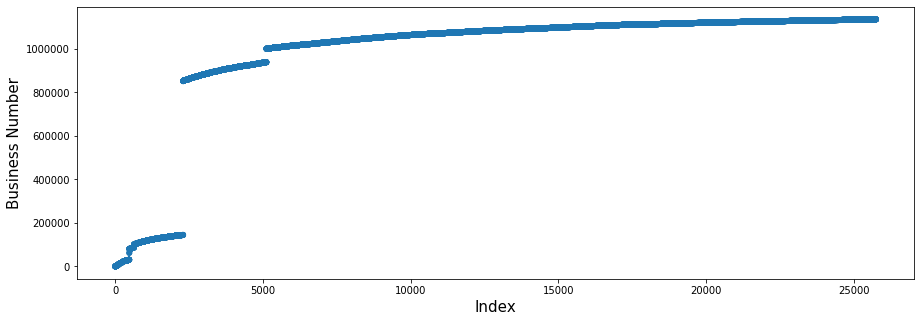

In [256]:
# examine the distribution of 
# business numbers visually
fig = plt.figure(figsize=(15, 5))

plt.scatter(x=business_licenses.index,
                y=business_licenses.LicenseNumber,
                alpha=1,
               edgecolors='none')
plt.xlabel('Index',fontsize=15)
plt.ylabel('Business Number',fontsize=15)

There are some jumps in the business license number sequencing over time.

Text(0, 0.5, 'Business Number')

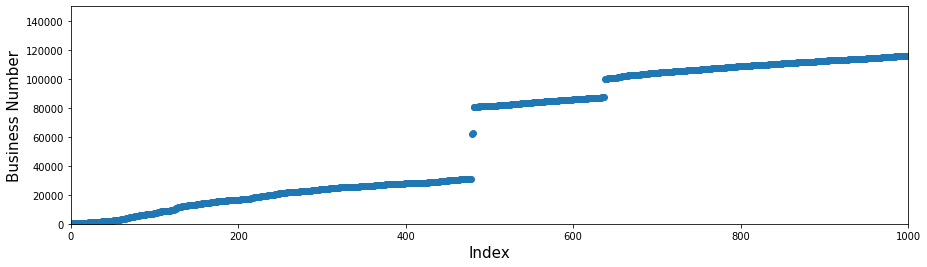

In [257]:
fig = plt.figure(figsize=(15, 4))

plt.scatter(x=business_licenses.index,
                y=business_licenses.LicenseNumber,
                alpha=1)

plt.xlim(0, 1000)
plt.ylim(0, 150000)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Business Number',fontsize=15)

In [224]:
# segment business licenses into 5 buckets
business_licenses['Bucket'] = pd.cut(business_licenses.index, 5, labels=[1,2,3,4,5])

In [225]:
#verify bins are distributed equally
business_licenses.Bucket.value_counts()

5    5151
4    5151
3    5151
2    5151
1    5151
Name: Bucket, dtype: int64

Text(0, 0.5, 'Business Number')

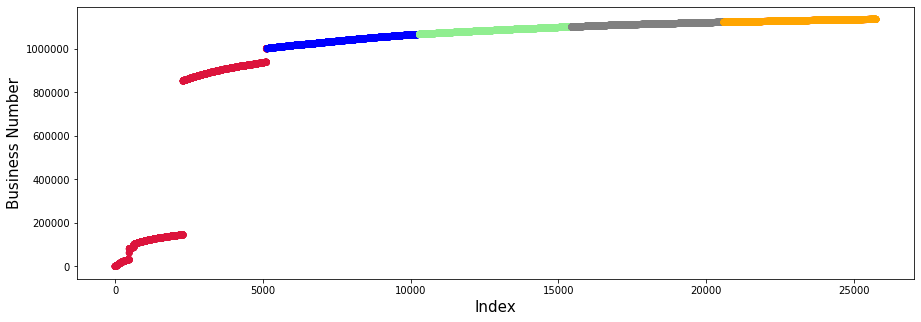

In [258]:
# examine the distribution of 
# business numbers visually
fig = plt.figure(figsize=(15, 5))

# assign colors to each bucket
colors = {1:'crimson', 2:'blue', 3:'lightgreen', 4:'grey', 5:'orange'}

plt.scatter(x=business_licenses.index,
            y=business_licenses.LicenseNumber,
            alpha=1,
            c=business_licenses.Bucket.apply(lambda x: colors[x]))

plt.xlabel('Index',fontsize=15)
plt.ylabel('Business Number',fontsize=15)

### Create Buckets

#### Bucket 1

In [227]:
# form bucket of businesses from earliest period of Scottsdale history
stopwords = ['THE',
            'OF',
            'AND',
            "'S"]

bucket_1_words = []

for row in business_licenses[business_licenses['Bucket'] == 1].loc[:,'BusinessName'].str.split():
    for business_name_token in row:
        if len(business_name_token) > 1 and business_name_token not in stopwords:
            bucket_1_words.append(business_name_token)

bucket_1_words[0:10]

['A-ACCENT',
 'PLUMBING',
 'INC',
 'ASSOCIATED',
 'FINISHES',
 'INC',
 "BARRY'S",
 'DANCE',
 'THEATRE',
 'SHOP']

In [241]:
# form tokens into dataframe
bucket_1_words_df = pd.DataFrame(bucket_1_words, columns=['tokens'])

# sort dataframe by frequency of tokens
bucket_1_word_count = bucket_1_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

# create row tag for graphing purposes
bucket_1_word_count['Bucket'] = 'Oldest 20%'

bucket_1_word_count.head()

,tokens,token_count,Bucket
2743,INC,1197,Oldest 20%
3236,LLC,581,Oldest 20%
4628,SCOTTSDALE,141,Oldest 20%
1373,COMPANY,135,Oldest 20%
1314,CO,132,Oldest 20%


### Bucket 5

In [230]:
# form bucket of businesses from earliest period of Scottsdale history
stopwords = ['THE',
            'OF',
            'AND',
            "'S"]

bucket_5_words = []

for row in business_licenses[business_licenses['Bucket'] == 5].loc[:,'BusinessName'].str.split():
    for business_name_token in row:
        if len(business_name_token) > 1 and business_name_token not in stopwords:
            bucket_5_words.append(business_name_token)

bucket_5_words[0:10]

['PINK',
 'ZEBRA',
 'AT',
 'HOME',
 'LLC',
 'SAEID',
 'MOTAKALEM',
 'MORTENSEN',
 'SIGNATURE',
 'HOMES']

In [242]:
# form tokens into dataframe
bucket_5_words_df = pd.DataFrame(bucket_5_words, columns=['tokens'])

# sort dataframe by frequency of tokens
bucket_5_word_count = bucket_5_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

# create row tag for graphing purposes
bucket_5_word_count['Bucket'] = 'Newest 20%'

bucket_5_word_count.head()

,tokens,token_count,Bucket
3389,LLC,1300,Newest 20%
2836,INC,528,Newest 20%
5001,SCOTTSDALE,166,Newest 20%
5056,SERVICES,91,Newest 20%
1370,CONSTRUCTION,87,Newest 20%


### Compare tokens exclusive of buckets

In [243]:
# join buckets together with outer join, providing NaN values for tokens not in the other bucket 
words_joined = pd.merge(bucket_5_word_count, bucket_1_word_count, how='outer', on='tokens')

# rename columns to be more descriptive
words_joined.rename(columns={'token_count_x': 'Newest 20%', 'token_count_y': 'Oldest 20%'}, inplace=True)

# filter only for tokens not in the other bucket
words_not_in_other = words_joined[words_joined['Newest 20%'].isnull() | words_joined['Oldest 20%'].isnull()]

words_not_in_other.head()

,tokens,Newest 20%,Bucket_x,Oldest 20%,Bucket_y
82,FLEEK,18.0,Newest 20%,NaN,NaN
88,AESTHETICS,16.0,Newest 20%,NaN,NaN
110,WL,14.0,Newest 20%,NaN,NaN
152,LASH,11.0,Newest 20%,NaN,NaN
164,CALIBER,10.0,Newest 20%,NaN,NaN


### Newest bucket words that don't show up at all in the oldest bucket.

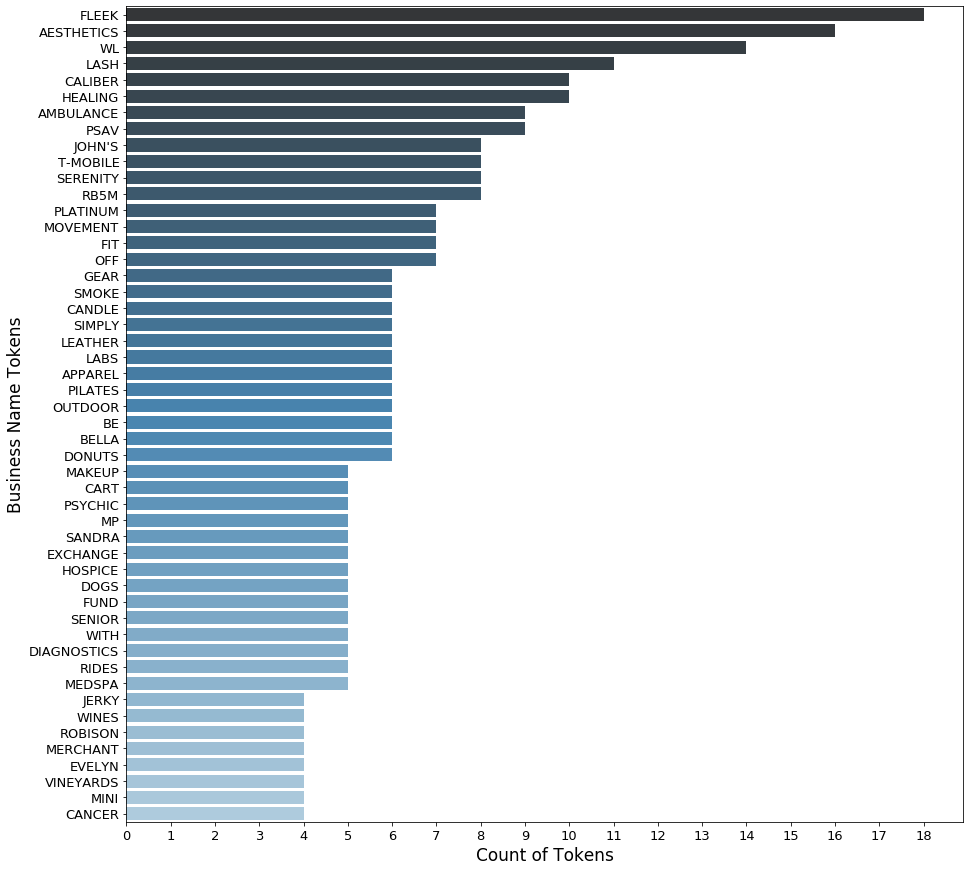

In [234]:
plt.subplots(figsize=(15,15))

ax = sns.barplot(x=words_not_in_other.sort_values(by='Newest 20%', ascending=False).head(50).loc[:,'Newest 20%'], \
             y=words_not_in_other.sort_values(by='Newest 20%', ascending=False).head(50).iloc[:,0], \
            data=words_not_in_other, palette=("Blues_d"))

plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

### Oldest bucket words that don't show up at all in the newest bucket.

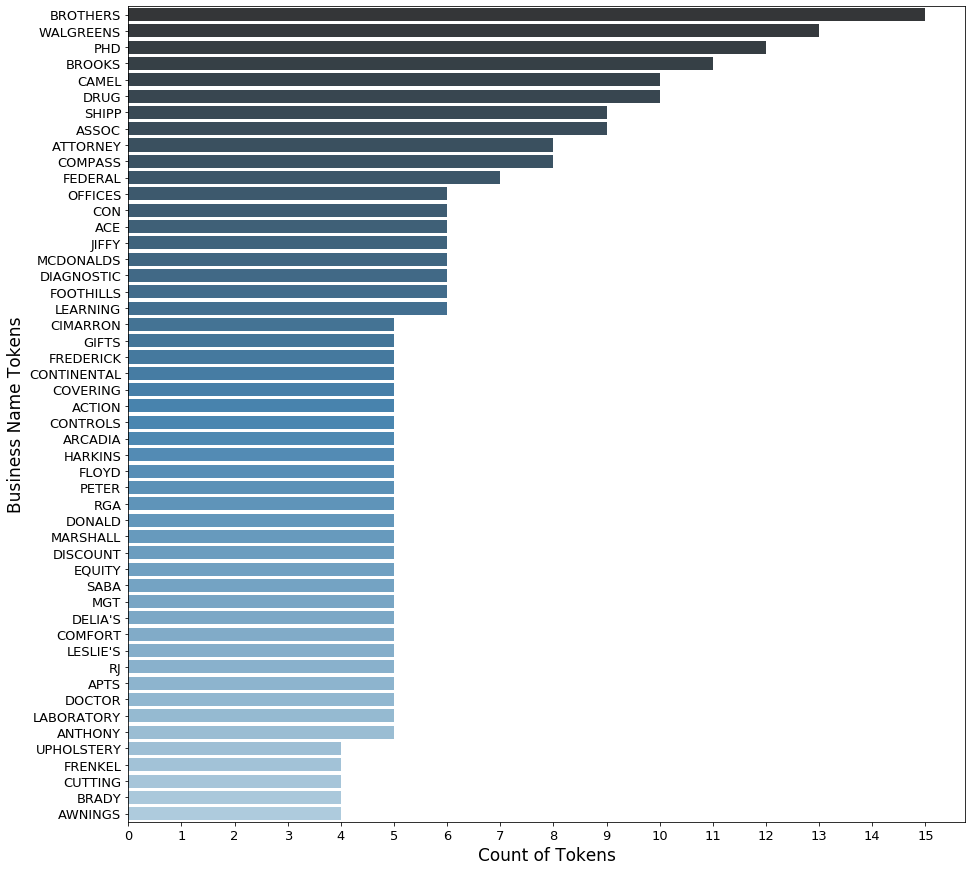

In [235]:
plt.subplots(figsize=(15,15))

ax = sns.barplot(x=words_not_in_other.sort_values(by='Oldest 20%', ascending=False).head(50).loc[:,'Oldest 20%'], \
             y=words_not_in_other.sort_values(by='Oldest 20%', ascending=False).head(50).iloc[:,0], \
            data=words_not_in_other, palette=("Blues_d"))

plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())

### Within the top 100 tokens for each bucket, which tokens have seen the biggest difference in frequency?

In [244]:
# find tokents that are in both buckets
# within the top 100
words_shared = pd.merge(bucket_5_word_count.head(100), bucket_1_word_count.head(100), how='inner', on='tokens')

In [245]:
# subset combined buckets with 
# tokens in both buckets
word_counts_combined = bucket_5_word_count.head(100).append(bucket_1_word_count.head(100)) \
    [bucket_5_word_count.head(100).append(bucket_1_word_count.head(100)).tokens.isin(words_shared.tokens.values)]

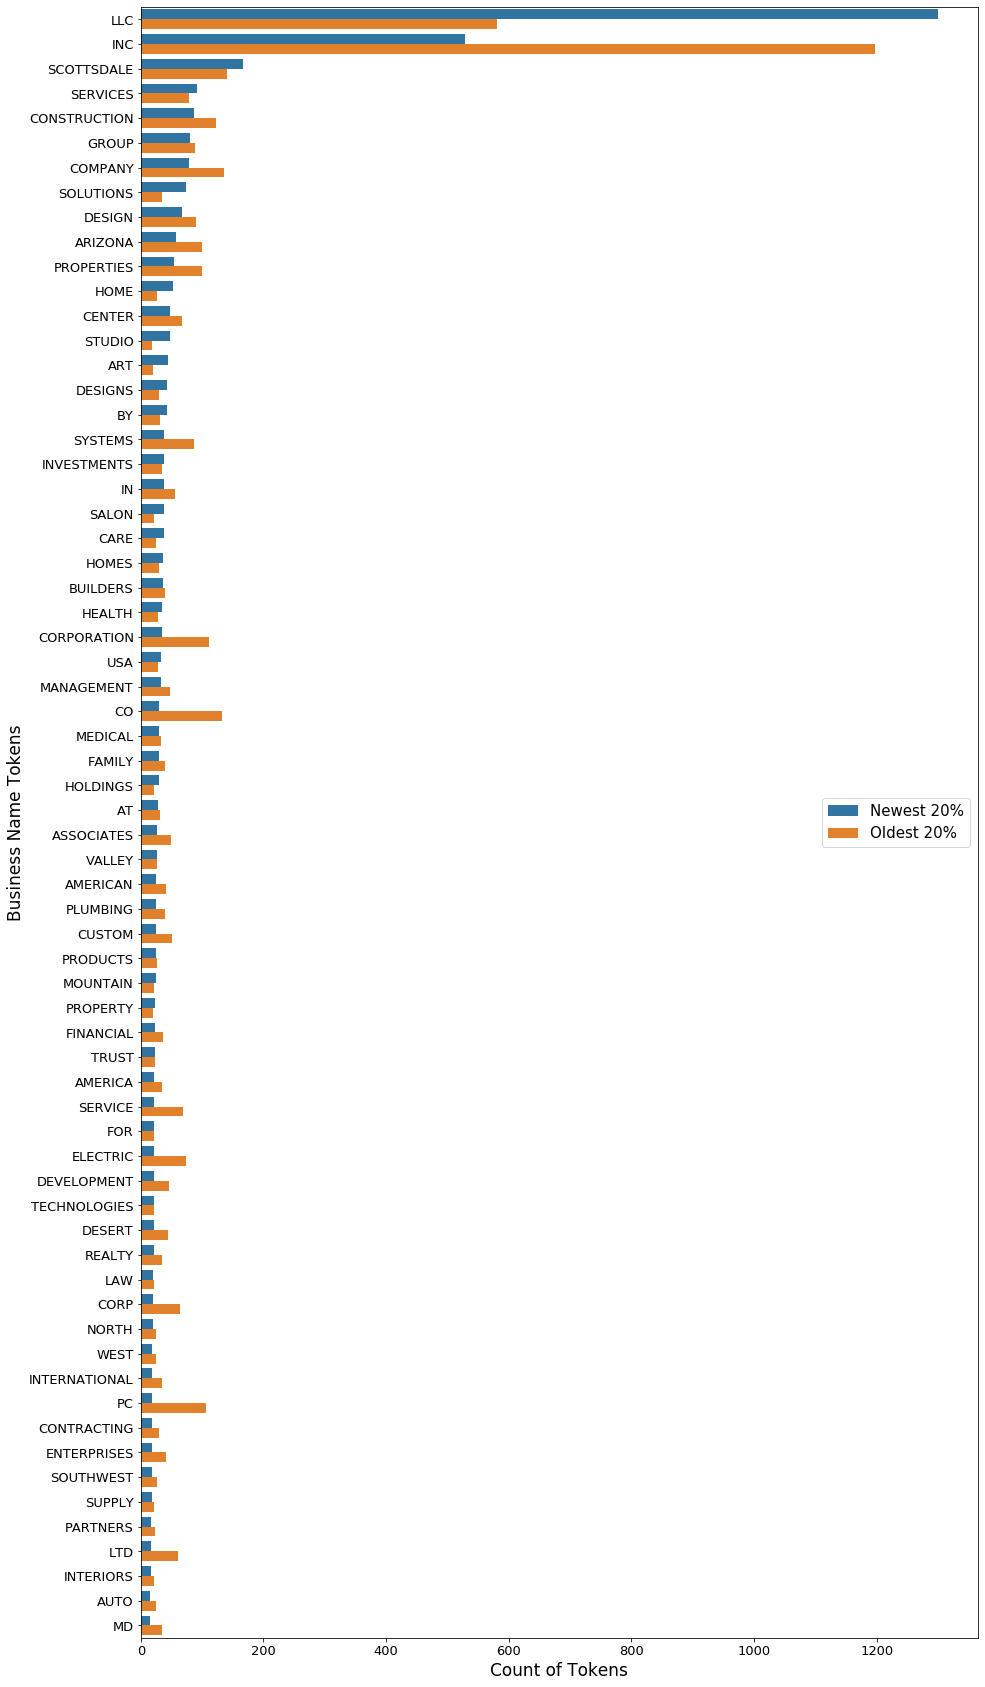

In [246]:
# plot comparison
plt.subplots(figsize=(15,30))

sns.barplot(x=word_counts_combined.loc[:,'token_count'], \
             y=word_counts_combined.loc[:,'tokens'], \
             hue=word_counts_combined.loc[:,'Bucket'], \
             data=word_counts_combined)

plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)
plt.legend(loc='center right',fontsize=15)
# plt.savefig('visualizations/Oldest Business License Name Tokens vs. Newest Business License Name Tokens(count).png')

In [251]:
# take the log of token count in order to prevent the data from being as skewed toward largest number of tokens
word_counts_combined['log'] = np.log(word_counts_combined.loc[:,'token_count'])

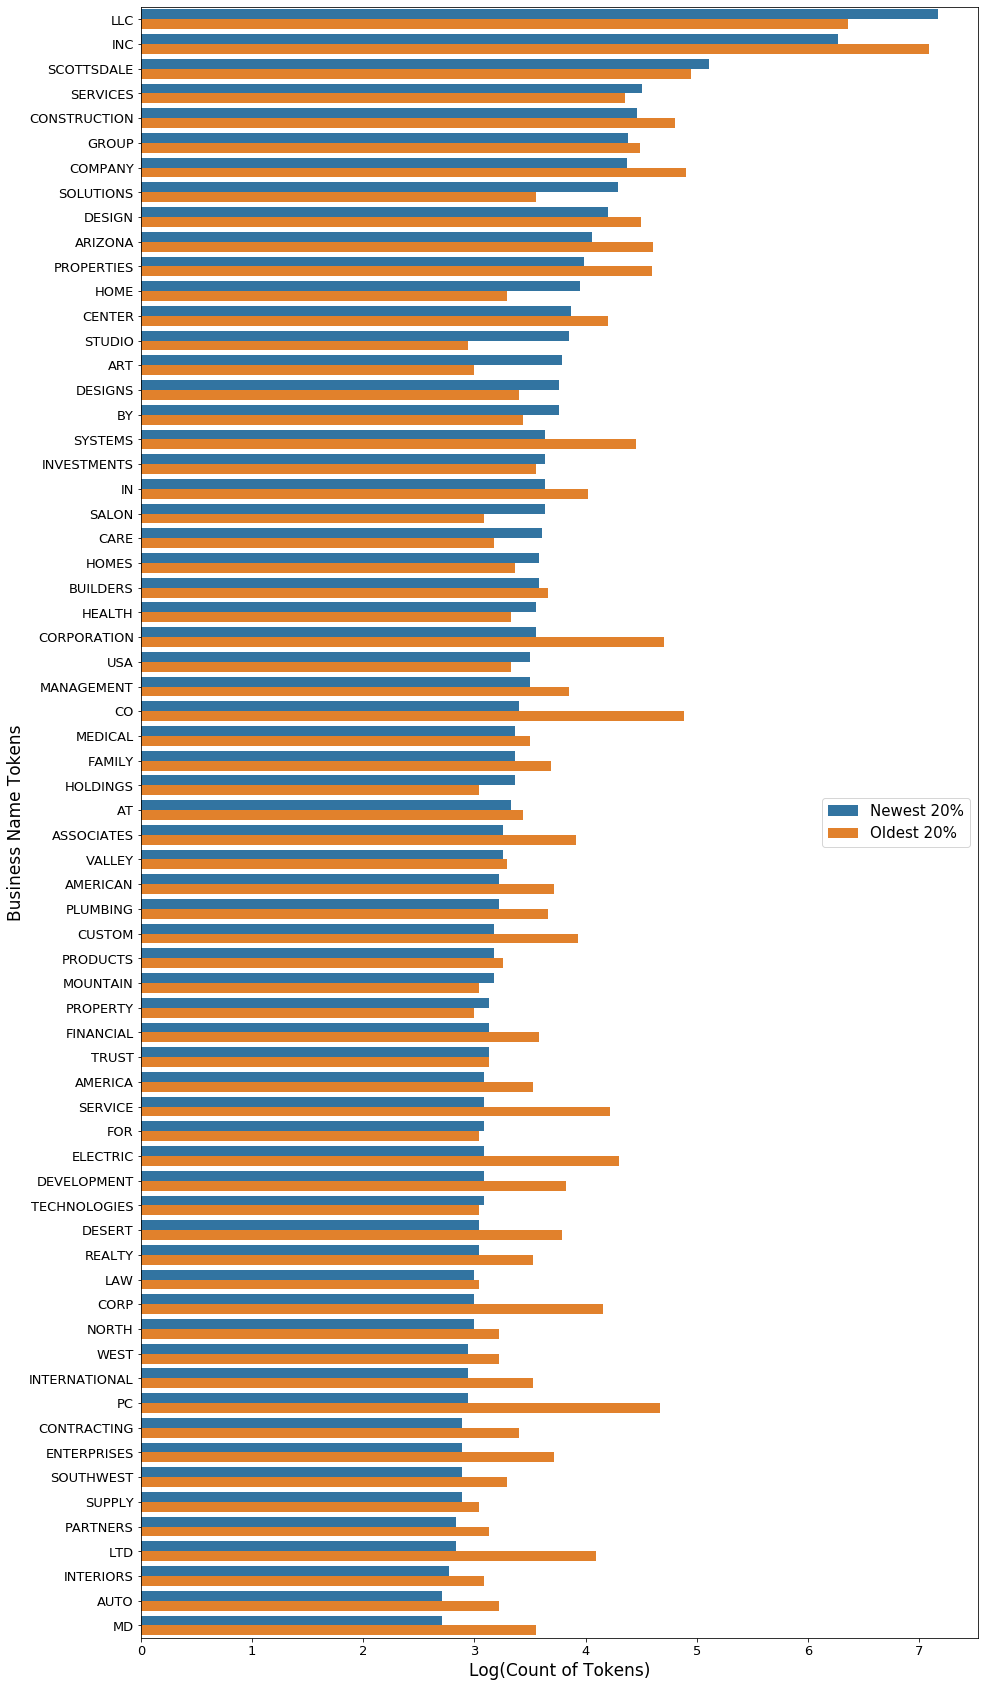

In [253]:
plt.subplots(figsize=(15,30))

sns.barplot(x=word_counts_combined.loc[:,'log'], \
             y=word_counts_combined.loc[:,'tokens'], \
             hue=word_counts_combined.loc[:,'Bucket'], \
             data=word_counts_combined)

plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Log(Count of Tokens)',fontsize=17)
plt.tick_params(labelsize=13)
plt.legend(loc='center right',fontsize=15)
# plt.savefig('visualizations/Oldest Business License Name Tokens vs. Newest Business License Name Tokens(log).png')

## Results: 

#### The largest difference by far being the prevelance of LLCs today, while Inc was much more common on the past.  
#### Recent businesses seem to be more concered with helping people take care of themselves.  Business name tokens such as "spa", "therapy", "nails", "massage" are not represented at all in the older business names.  However, this could be that these sorts of businesses don't have the longevity that other businesses have.  
#### Older businesses include name tokens not represented in newer business names include "bank", "pool", "air", "painting" - businesses that seem to lend themselves to construction/maintenance services.